In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

The sample data concists of scanned, hand written digits. The goal is to write a program that can correctly identify the digits.

In [49]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


The data concists of 55000 digits. Each digit is digitalized with values between 0 and 1, indigating the greyness.

In [50]:
mnist.train.images.shape

(55000, 784)

Grab a random image and view it

In [51]:
mnist.train.images[2].shape

(784,)

In [52]:
sample = mnist.train.images[45000].reshape(28, 28)

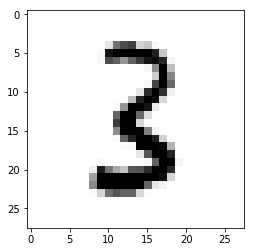

In [53]:
plt.imshow(sample, cmap="Greys")

In [54]:
# Parameters
learning_rate = 0.001   # lower value gives better result but slower
training_epochs = 20    # number of cycles
batch_size = 100        # number of samples

Define parameters that are needed

In [55]:
n_classes = 10         # number of digits that will be checked
n_samples = mnist.train.num_examples
n_input = 784          # what the input looks like
n_hidden_1 = 256       # number of neurons in the hidden layers
n_hidden_2 = 256

In [56]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for data input
    weights: Dictionary of weights
    biases: dictionary of bias values
    '''
    # first hidden layer rectifier activation 
    # x * w + b
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Pass layer 1 to the RELU function. f(x) = max(0, x)
    layer_1 = tf.nn.relu(layer_1)
    
    # second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b1'])
    layer_2 = tf.nn.relu(layer_2)
    
    # finally the output layer
    out_layer = tf.matmul(layer_2, weights['out'] + biases['out'])
    return out_layer

In [57]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [58]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

Declare placeholders

In [59]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

Prepare model and train

In [60]:
pred =multilayer_perceptron(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Investigating xsamp

In [61]:
t = mnist.train.next_batch(1)
Xsamp, ysamp = t

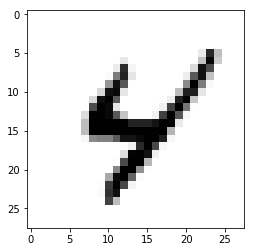

In [62]:
plt.imshow(Xsamp.reshape(28, 28), cmap="Greys")

In [63]:
ysamp

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

ysamp has a 1 at postition 9, since the digit is a 9.

## Run the session

In [64]:
# initializes weights and biases
init = tf.global_variables_initializer()

In [65]:
# launch session
sess = tf.InteractiveSession()
sess.run(init)

# Run 15 loops (training_epochs = 15)
for epoch in range(training_epochs):
    # Goal is to minimize cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    # loop over all batches
    for i in range(total_batch):
        # Grab the next batch of training data and labels
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        
        # compute average cost
        avg_cost += c/total_batch
        
    print("Epoch: {}, cost={:.4f}".format(epoch+1, avg_cost))
    
print("Model completed {} Epochs of training".format(training_epochs))

Epoch: 1, cost=876.8503
Epoch: 2, cost=36.5654
Epoch: 3, cost=22.3659
Epoch: 4, cost=15.7197
Epoch: 5, cost=11.7144
Epoch: 6, cost=9.1075
Epoch: 7, cost=7.1420
Epoch: 8, cost=5.6862
Epoch: 9, cost=4.5923
Epoch: 10, cost=3.7096
Epoch: 11, cost=3.0551
Epoch: 12, cost=2.4904
Epoch: 13, cost=2.0281
Epoch: 14, cost=1.6531
Epoch: 15, cost=1.3869
Epoch: 16, cost=1.1367
Epoch: 17, cost=0.9263
Epoch: 18, cost=0.7807
Epoch: 19, cost=0.6713
Epoch: 20, cost=0.5350
Model completed 20 Epochs of training


## Evaluate model

In [66]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
correct_predictions = tf.cast(correct_predictions, tf.float32)
accuracy = tf.reduce_mean(correct_predictions)
accuracy.eval({x: mnist.test.images, y:mnist.test.labels})

0.9307

Tensor("Cast_1:0", shape=(?,), dtype=float32)
